In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
dataset = pd.read_csv('emails.csv')

In [ ]:
dataset.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
dataset.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,7.289017,6.771098,5.916763,3.159538,3.492486,2.707514,61.804624,2.828902,2.346821,11.363006,...,0.016204,0.008102,0.010417,0.096065,0.008102,0.001157,0.012731,0.981481,0.006944,0.283565
std,13.420106,10.811874,14.230168,6.501779,5.100404,6.342738,110.616852,4.847761,7.170376,20.264227,...,0.197825,0.122466,0.112417,0.499161,0.122466,0.034021,0.139773,4.297686,0.083092,0.450989
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,8.000000,5.000000,3.000000,4.000000,2.000000,62.000000,3.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,188.000000,83.000000,39.000000,77.000000,1898.000000,42.000000,92.000000,223.000000,...,4.000000,3.000000,2.000000,6.000000,3.000000,1.000000,3.000000,114.000000,1.000000,1.000000


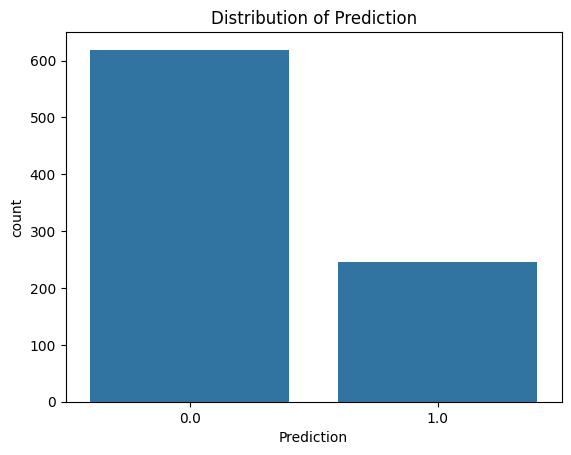

In [ ]:
sns.countplot(x='Prediction', data=dataset)
plt.title('Distribution of Prediction')
plt.show()

In [ ]:
dataset['word_count'] = dataset.drop(columns=['Email No.', 'Prediction']).sum(axis=1)

average_word_count = dataset.groupby('Prediction')['word_count'].mean()

print("Average word count for not spam emails (Prediction = 0):", average_word_count[0])
print("Average word count for spam emails (Prediction = 1):", average_word_count[1])

Average word count for not spam emails (Prediction = 0): 1141.1437802907917
Average word count for spam emails (Prediction = 1): 1688.3142857142857


In [ ]:
correlation = dataset['word_count'].corr(dataset['Prediction'])
print("Correlation between wordcount and prediction: ", correlation)

Correlation between wordcount and prediction:  0.11939063261946356


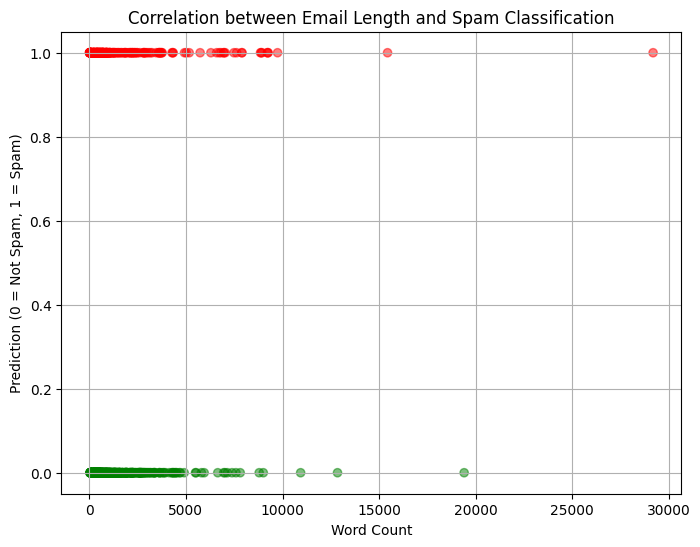

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['green' if pred == 0 else 'red' for pred in dataset['Prediction']]
plt.scatter(dataset['word_count'], dataset['Prediction'], color=colors, alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('Prediction (0 = Not Spam, 1 = Spam)')
plt.title('Correlation between Email Length and Spam Classification')
plt.grid(True)
plt.show()

In [ ]:
dataset.dtypes.value_counts()

int64      2353
float64     649
object        1
Name: count, dtype: int64

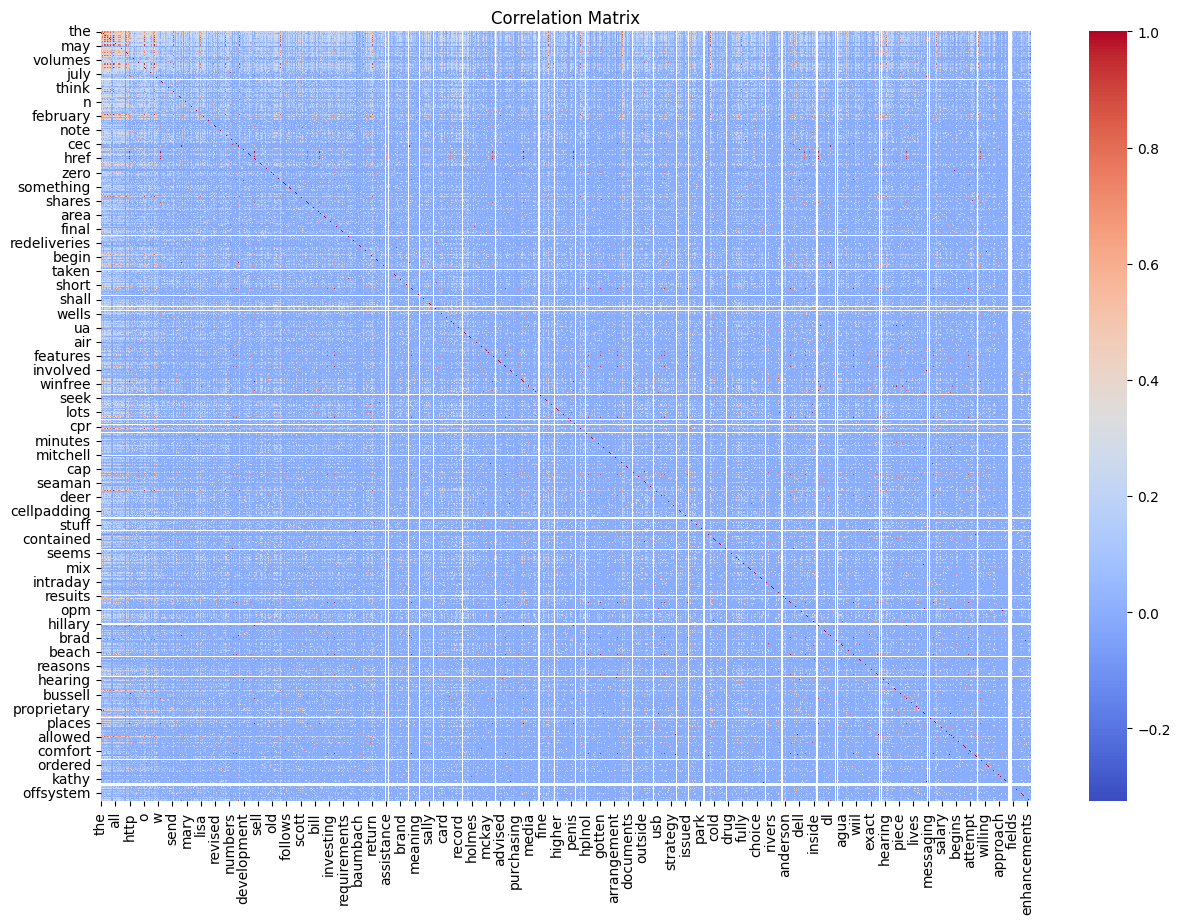

In [ ]:
numeric_dataset = dataset.select_dtypes(include=[np.number])

correlation_matrix = numeric_dataset.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
missing_values = dataset['Prediction'].isnull().sum()
print(f"Number of missing values in 'Prediction': {missing_values}")

Number of missing values in 'Prediction': 1


In [ ]:
dataset = dataset.dropna(subset=['Prediction'])

X = dataset.drop(columns=['Email No.', 'Prediction'])
y = dataset['Prediction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.72
confusion Matrix : [[124   0]
 [ 48   1]]
Precision Score:  1.0


In [ ]:
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)
y_pred_svc = svc_classifier.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.79
confusion Matrix : [[124   0]
 [ 36  13]]
Precision Score:  1.0


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.93
confusion Matrix : [[123   1]
 [ 11  38]]
Precision Score:  0.9743589743589743


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.92
confusion Matrix : [[121   3]
 [ 10  39]]
Precision Score:  0.9285714285714286
